Tamaño del DataFrame combinado: (14828, 39)
  Car_Name    Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014.0           3.35           5.59     27000.0    Petrol   
1      sx4  2013.0           4.75           9.54     43000.0    Diesel   
2     ciaz  2017.0           7.25           9.85      6900.0    Petrol   
3  wagon r  2011.0           2.85           4.15      5200.0    Petrol   
4    swift  2014.0           4.60           6.87     42450.0    Diesel   

  Seller_Type Transmission Owner name  ...  Seller Type  Engine  Max Power  \
0      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
1      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
2      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
3      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   
4      Dealer       Manual     0  NaN  ...          NaN     NaN        NaN   

  Max Torque Drivetrain Length Width Heigh

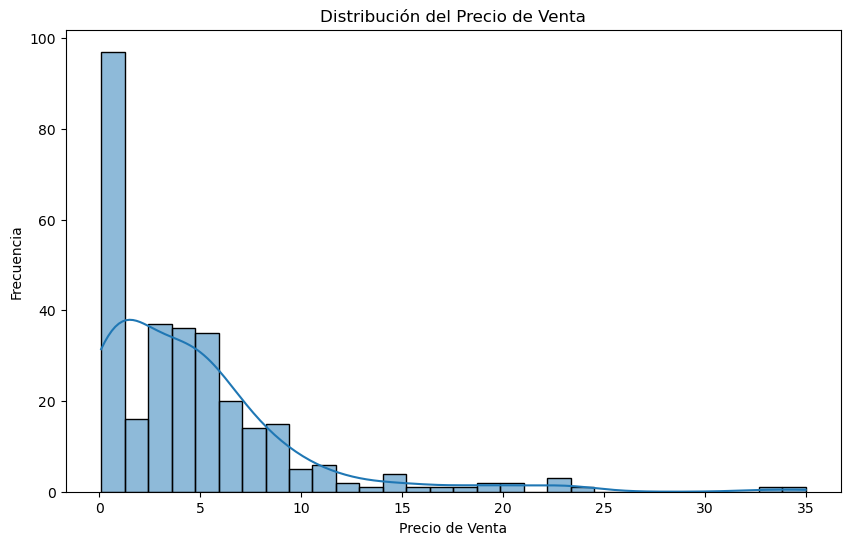

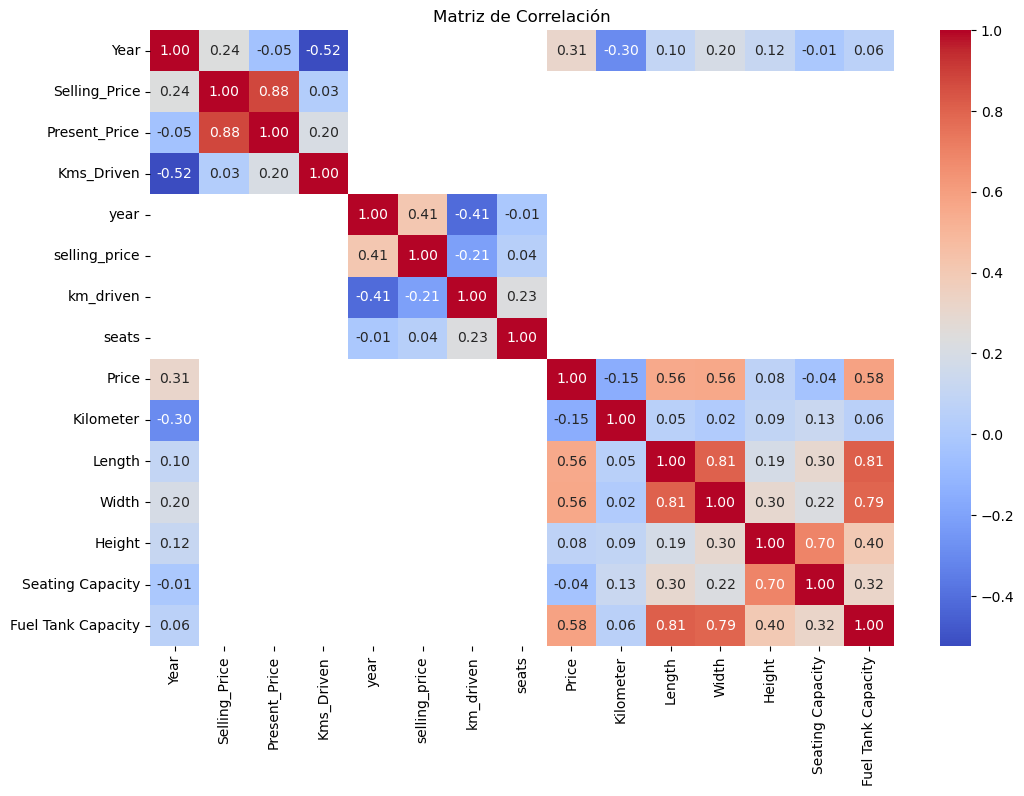

Car_Name                  0
Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Fuel_Type                 0
Seller_Type               0
Transmission              0
Owner                     0
name                    299
year                    299
selling_price           299
km_driven               299
fuel                    299
seller_type             299
transmission            299
owner                   299
mileage                3876
engine                 3876
max_power              3876
torque                 3876
seats                  3876
Make                  10800
Model                 10800
Price                 10800
Kilometer             10800
Fuel Type             10800
Location              10800
Color                 10800
Seller Type           10800
Engine                10800
Max Power             10800
Max Torque            10800
Drivetrain            10800
Length                10800
Width               

C:\Users\SM ZONA GAMER\AppData\Local\Temp\ipykernel_13900\3877355973.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)  # Llenar hacia adelante


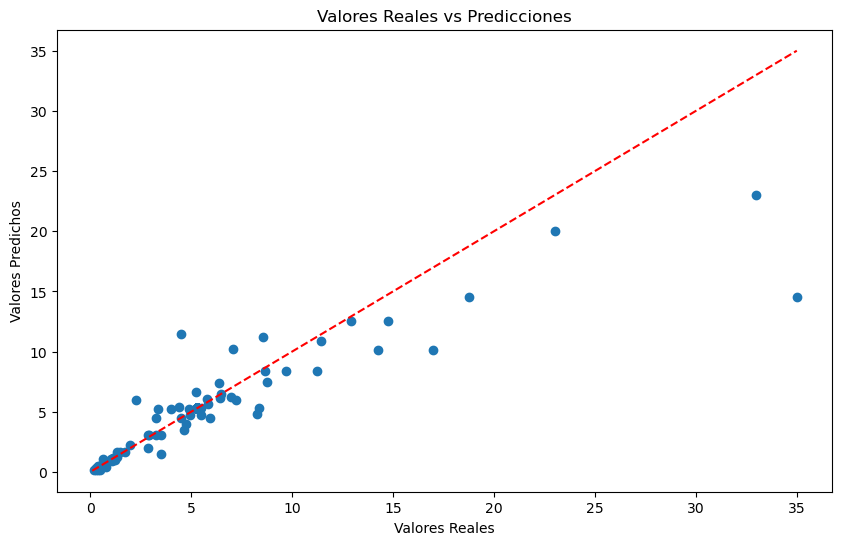

### Análisis de Resultados ###
El modelo ha sido evaluado utilizando el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).
El MSE es de 0.2931570373250388, lo que indica el promedio de los errores cuadrados de las predicciones.
El R^2 es de 0.762611150007578, lo que indica la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los cuatro archivos CSV
file_paths = [
    r"C:\Users\SM ZONA GAMER\Documents\UNAD\Vehicles 2\car data.csv", 
    r"C:\Users\SM ZONA GAMER\Documents\UNAD\Vehicles 2\CAR DETAILS FROM CAR DEKHO.csv",
    r"C:\Users\SM ZONA GAMER\Documents\UNAD\Vehicles 2\Car details v3.csv",
    r"C:\Users\SM ZONA GAMER\Documents\UNAD\Vehicles 2\car details v4.csv"
]

# Combinar todos los DataFrames
combined_df = pd.concat((pd.read_csv(file) for file in file_paths), ignore_index=True)

# Paso 1: Análisis exploratorio de los datos
print("Tamaño del DataFrame combinado:", combined_df.shape)
print(combined_df.head())  # Mostrar las primeras filas del DataFrame

# Visualizar la distribución del precio de venta
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Selling_Price'], bins=30, kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

# Correlación entre variables
# Filtrar solo las columnas numéricas
numeric_df = combined_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Paso 2: Preprocesar los datos
# Convertir columnas relevantes a tipos adecuados y manejar valores faltantes
combined_df['Fuel_Type'] = combined_df['Fuel_Type'].astype('category')
combined_df['Seller_Type'] = combined_df['Seller_Type'].astype('category')
combined_df['Transmission'] = combined_df['Transmission'].astype('category')

# Eliminar filas duplicadas si existen
combined_df.drop_duplicates(inplace=True)

# Verificar y llenar valores faltantes
combined_df.fillna(method='ffill', inplace=True)  # Llenar hacia adelante

# Verificar si hay valores faltantes
print(combined_df.isnull().sum())

# Paso 3: Seleccionar características y objetivo
X = combined_df[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = combined_df['Selling_Price']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Verificar las dimensiones de X e y
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)

# Paso 4: Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenar el modelo
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Paso 6: Evaluar el desempeño del modelo
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R^2: {r2}")

# Paso 7: Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predicciones')
plt.show()

# Paso 8: Interpretar, analizar y documentar los resultados
print("### Análisis de Resultados ###")
print("El modelo ha sido evaluado utilizando el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).")
print(f"El MSE es de {mse}, lo que indica el promedio de los errores cuadrados de las predicciones.")
print(f"El R^2 es de {r2}, lo que indica la proporción de la varianza de la variable dependiente que es predecible a partir de las variables independientes.")
